In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mafuangimemkamon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mafuangimemkamon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mafuangimemkamon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
df = pd.read_csv('processed_data/stat_courses.csv')
df = df[df['filename'].str.contains('STAT')|df['text'].str.lower().str.contains('statistics')]
df


,filename,text,cleaned_text
0,IGA 451M - 2020 Spring 1 (170371).pdf,"IGA-451M: CONTROVERSIES IN CLIMATE, ENERGY \n&...","IGA-451M: CONTROVERSIES IN CLIMATE, ENERGY & T..."
1,STAT 123 - 2022 Spring (126048).pdf,"Thank\tyou\tfor\ttaking\tStat\t123\t2022,\tQua...","Thank you for taking Stat 123 2022, Quantitati..."
2,STAT 364 - 2022 Spring (214539).pdf,Stat364 : Scalable Statistical Inference for B...,Stat364 : Scalable Statistical Inference for B...
3,PSY 2030 - 2021 Fall (160667).pdf,Bayesian Data Analysis\nPsych 2030 { Fall 2021...,Bayesian Data Analysis Psych 2030 { Fall 2021 ...
4,EPI 224 - 2024 Fall 2 (190291).pdf,\nEPI224 Cancer Prevention (2023 Fall 2) Syl...,EPI224 Cancer Prevention (2023 Fall 2) Syllab...
...,...,...,...
242,STAT 171 - 2024 Spring (113721).pdf,"Statistics 171: Stochastic Processes, Spring 2...","Statistics 171: Stochastic Processes, Spring 2..."
245,STAT 139 - 2024 Fall (110751).pdf,STAT 139: Introduction to Linear Models\nFall ...,STAT 139: Introduction to Linear Models Fall 2...
246,STAT 221 - 2020 Fall (115077).pdf,Fall 2020\nSTAT 221: Computational Tools for S...,Fall 2020 STAT 221: Computational Tools for St...
247,BIOSTAT 241_BST 241 - 2024 Spring (190066).pdf,BST 241/ BIOSTAT 241: Inference II\n Spring 2...,BST 241/ BIOSTAT 241: Inference II Spring 202...


In [64]:
documents = df['cleaned_text'].values

In [71]:
# Preprocess the data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Lemmatize and remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    return ' '.join(tokens)  # Join tokens back into a single string

# Preprocess each document
processed_docs = [preprocess(doc) for doc in documents]

# Convert documents to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_docs)

# Train the LDA model
num_topics = 6
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, max_iter=100)
lda_model.fit(X)
print(lda_model.perplexity(X))

# Display the topics
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}: ", [feature_names[i] for i in topic.argsort()[-10:]])

2399.470018092583
Topic 1:  ['change', 'care', 'education', 'public', 'class', 'reading', 'policy', 'climate', 'http', 'health']
Topic 2:  ['homework', 'final', 'work', 'lecture', 'problem', 'data', 'assignment', 'class', 'student', 'course']
Topic 3:  ['database', 'group', 'question', 'reading', 'analysis', 'data', 'student', 'week', 'project', 'course']
Topic 4:  ['meeting', 'paper', 'intervention', 'problem', 'child', 'page', 'economic', 'reading', 'law', 'economics']
Topic 5:  ['learning', 'health', 'case', 'lecture', 'assignment', 'reading', 'section', 'text', 'http', 'data']
Topic 6:  ['power', 'screening', 'canadian', 'toronto', 'mining', 'prevention', 'university', 'press', 'canada', 'cancer']


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
# Step 3: Get topic distribution for each document
topic_distribution = lda_model.transform(X)

# Step 4: Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
topic_distribution_2d = pca.fit_transform(topic_distribution)

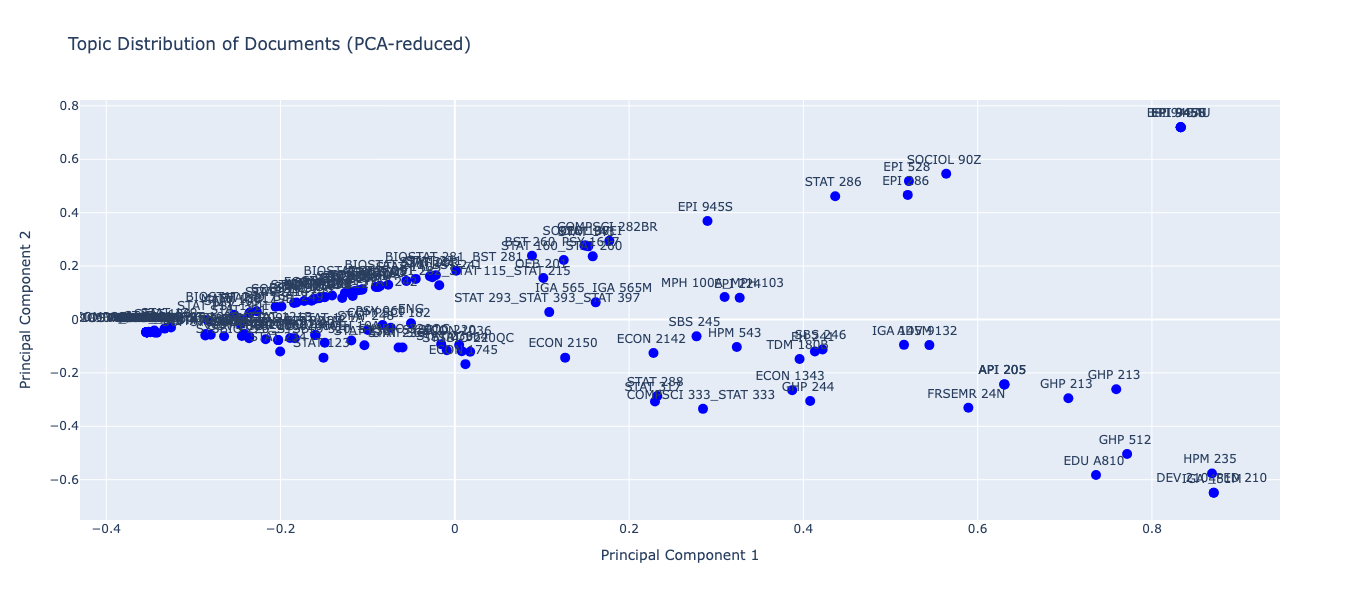

In [73]:
import plotly.graph_objects as go

# Step 5: Create interactive scatter plot using Plotly
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=topic_distribution_2d[:, 0], 
    y=topic_distribution_2d[:, 1],
    mode='markers+text',
    text=df['filename'].str.split('-').str[0],
    textposition='top center',
    marker=dict(size=10, color='blue')
))

# Title and labels
fig.update_layout(
    title="Topic Distribution of Documents (PCA-reduced)",
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    template="plotly",
    showlegend=False,
    width=1000,  # Width of the plot (in pixels)
    height=600   # Height of the plot (in pixels)
)

# Show plot
fig.show()
